# Get the data and make imports

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2023-02-25 12:28:30--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: 'sp500_close.csv'

sp500_close.csv     100%[===================>]   3.95M  2.41MB/s    in 1.6s    

2023-02-25 12:28:32 (2.41 MB/s) - 'sp500_close.csv' saved [4143332/4143332]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


<Axes: >

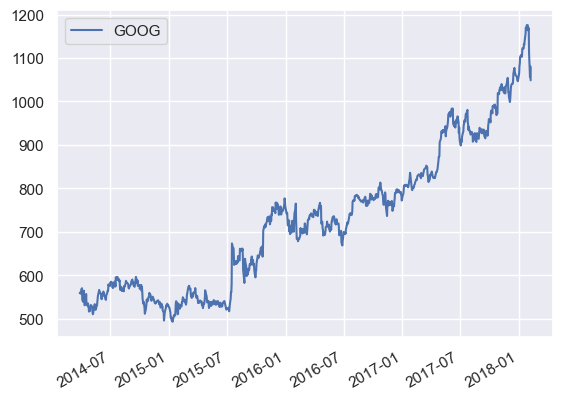

In [6]:
goog = close[['GOOG']].copy().dropna()
goog.plot()

In [7]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<Axes: >

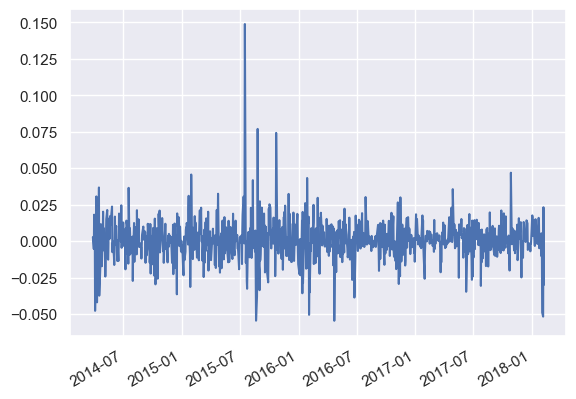

In [8]:
goog['return'] = goog.pct_change(1)
goog['log_return'] = np.log(goog['return'] + 1)
goog['log_return'].plot()

# Calculate Moving Averages

In [11]:
# Simple Moving Average 

goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,return,log_return,SMA-10
2014-03-27,558.46,NaN,NaN,NaN
2014-03-28,559.99,0.002740,0.002736,NaN
2014-03-31,556.97,-0.005393,-0.005408,NaN
2014-04-01,567.16,0.018295,0.018130,NaN
2014-04-02,567.00,-0.000282,-0.000282,NaN
2014-04-03,569.74,0.004832,0.004821,NaN
2014-04-04,543.14,-0.046688,-0.047813,NaN
2014-04-07,538.15,-0.009187,-0.009230,NaN
2014-04-08,554.90,0.031125,0.030651,NaN
2014-04-09,564.14,0.016652,0.016515,557.965


<Axes: >

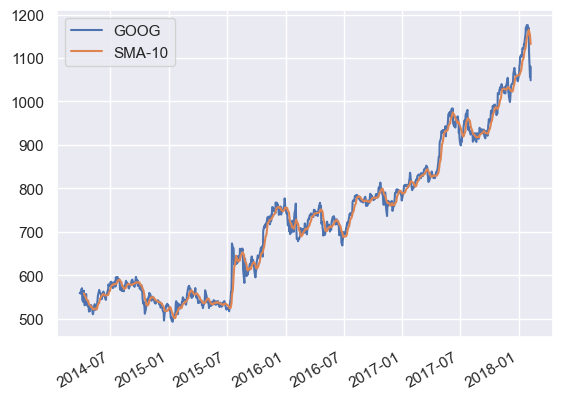

In [15]:
# Plot the moving average vs. the original timeframe

goog[['GOOG', 'SMA-10']].plot()

<Axes: >

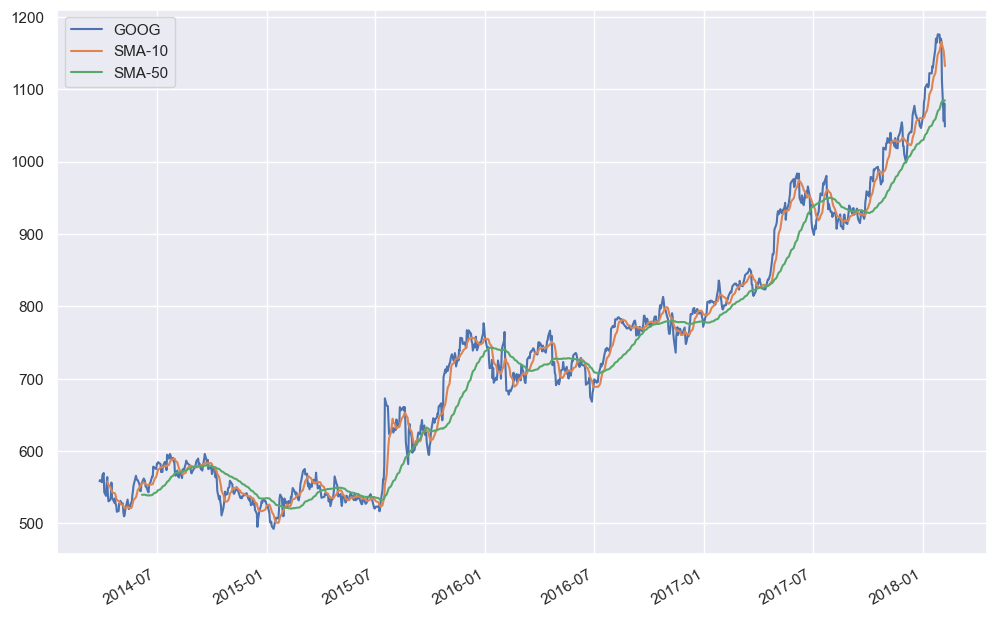

In [17]:
# Calculate a new moving average

goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog[['GOOG', 'SMA-10', 'SMA-50']].plot(figsize=(12, 8))

# Experiment with a multidimensional time series

In [19]:
# Calculate a new moving average for a multiple timeframe 

goog_appl = close[['GOOG', 'AAPL']].copy().dropna()
goog_appl.head()

,GOOG,AAPL
2014-03-27,558.46,76.7799
2014-03-28,559.99,76.6942
2014-03-31,556.97,76.6771
2014-04-01,567.16,77.3785
2014-04-02,567.00,77.5071


In [20]:
# Calculate the covariance between the two time series using the rolling() method and the cov() method of the DataFrame class

cov = goog_appl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [22]:
# Extract the covariance between the two time series for the date 2018-02-07

cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [24]:
# Calculate the return of the two time series

goog_appl_ret = np.log(goog_appl.pct_change(1) + 1)
goog_appl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


<Axes: >

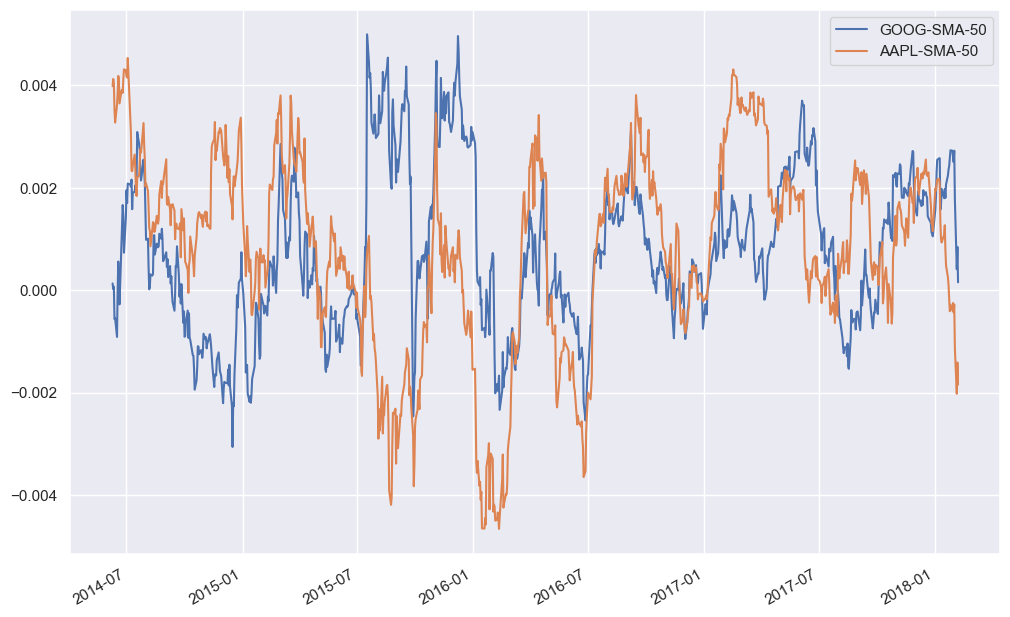

In [25]:
# Calculate the rolling average between the two time series

goog_appl_ret['GOOG-SMA-50'] = goog_appl_ret['GOOG'].rolling(50).mean()
goog_appl_ret['AAPL-SMA-50'] = goog_appl_ret['AAPL'].rolling(50).mean()
goog_appl_ret[['GOOG-SMA-50', 'AAPL-SMA-50']].plot(figsize=(12, 8))

In [28]:
# Calculate the correlation between the two time series

cov = goog_appl_ret[['GOOG', 'AAPL']].rolling(50).corr()
cov.tail(20)

GOOG      AAPL
2018-01-25 GOOG  1.000000  0.537973
           AAPL  0.537973  1.000000
2018-01-26 GOOG  1.000000  0.536838
           AAPL  0.536838  1.000000
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000